<a href="https://colab.research.google.com/github/jaiswalgaurav012002/ir_retrieval/blob/main/IR_neural%20network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

performing exploratory data analysis on the raw dataset before the data augmnetation and datset refining


In [ ]:
import pandas as pd

# Load your dataset (change the file name if necessary)
df = pd.read_csv('/content/combined_dataset.csv')

# Display the first few rows to understand the data
print(df.head())


   Unnamed: 0                                               link  \
0           0  https://twitter.com/BillGates/status/185461127...   
1           1  https://twitter.com/BillGates/status/183068966...   
2           2  https://twitter.com/BillGates/status/182136314...   
3           3  https://twitter.com/BillGates/status/181691549...   
4           4  https://twitter.com/BillGates/status/181073592...   

                                                text        user  likes  \
0  Congratulations to President Trump and VP-elec...  Bill Gates   9079   
1  Thank you @AbiyAhmedAli for your warm welcome ...  Bill Gates   9123   
2  Aidan’s work to end polio saved countless live...  Bill Gates   5184   
3  Thanks to incredible work by Indian experts, a...  Bill Gates   5424   
4  With Khanmigo’s assistance, teachers at First ...  Bill Gates   3641   

   quotes  retweets  comments  
0    3645      2075         0  
1     494      4394         0  
2     242      1731         0  
3     204   

In [ ]:
# Check the shape of the dataset (rows, columns)
print(df.shape)

# Check the column names and data types
print(df.info())


(243, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  243 non-null    int64 
 1   link        243 non-null    object
 2   text        238 non-null    object
 3   user        243 non-null    object
 4   likes       243 non-null    int64 
 5   quotes      243 non-null    int64 
 6   retweets    243 non-null    int64 
 7   comments    243 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 15.3+ KB
None


In [ ]:
# If needed, rename columns to be more readable
df.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)


In [ ]:
# Check for missing values
print(df.isnull().sum())


Unnamed: 0    0
link          0
text          5
user          0
likes         0
quotes        0
retweets      0
comments      0
dtype: int64


In [ ]:
df.dropna(inplace=True)  # Removes rows with missing values


In [ ]:
print(df.isnull().sum())


Unnamed: 0    0
link          0
text          0
user          0
likes         0
quotes        0
retweets      0
comments      0
dtype: int64


In [ ]:
# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns (like counts, unique values, etc.)
print(df.describe(include=['object']))


       Unnamed: 0         likes        quotes      retweets      comments
count  238.000000  2.380000e+02    238.000000    238.000000    238.000000
mean    34.424370  6.163911e+04    696.067227   5196.121849   2923.067227
std     24.256378  1.462036e+05   1819.228344   9388.342637   6073.406129
min      0.000000  6.600000e+01      3.000000     11.000000      0.000000
25%     14.250000  2.785500e+03     68.000000    612.500000      0.000000
50%     29.000000  9.451000e+03    138.500000   1373.000000    957.500000
75%     53.000000  5.915450e+04    426.000000   5231.250000   3265.750000
max     89.000000  1.363276e+06  13585.000000  71978.000000  62128.000000
                                                     link text        user
count                                                 238  238         238
unique                                                238  237          38
top     https://twitter.com/MrBeast/status/17969464553...  Yes  Bill Gates
freq                              

In [ ]:
import pandas as pd
import re
from google.colab import files

# Step 1: Load your dataset (replace with your actual file path)
df = pd.read_csv('/content/combined_dataset.csv')  # Ensure you uploaded your file

# Step 2: Define a function to remove special characters
def remove_special_characters(text):
    # Ensure the value is a string (convert non-strings to empty string)
    if isinstance(text, str):
        # This regex removes everything except letters, numbers, and spaces
        return re.sub(r'[^a-zA-Z0-9\s]', '', text)
    else:
        return text  # Return the value unchanged if it's not a string

# Step 3: Apply the function to all columns that are of type 'object' (text columns)
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].apply(remove_special_characters)

# Step 4: Save the cleaned dataset to a new CSV file
df.to_csv('/content/cleaned_dataset.csv', index=False)

# Step 5: Download the cleaned dataset
files.download('/content/cleaned_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install vaderSentiment


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/cleaned_dataset.csv')

# Print the column names to verify the correct column for the tweet content
print(df.columns)


Index(['Unnamed: 0', 'link', 'text', 'user', 'likes', 'quotes', 'retweets',
       'comments'],
      dtype='object')


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from google.colab import files

# Load your dataset
df = pd.read_csv('/content/cleaned_dataset.csv')

# Print column names to ensure we're using the correct column for tweet text
print(df.columns)

# Handle missing values: Replace NaNs with an empty string (or a default value like "No text")
df['text'] = df['text'].fillna('')

# Ensure all values in 'text' column are strings
df['text'] = df['text'].astype(str)

# Initialize VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment as either "positive" or "negative"
def classify_sentiment_binary(tweet):
    # Get the polarity scores
    score = analyzer.polarity_scores(tweet)
    # We define a threshold to classify as positive or negative
    if score['compound'] > 0.05:
        return 'positive'
    else:
        return 'negative'  # We classify neutral as negative in this binary classification task

# Apply sentiment classification to the 'text' column
df['type_of_tweet'] = df['text'].apply(classify_sentiment_binary)

# Save the new dataset with the 'type_of_tweet' label
df.to_csv('/content/sentiment_binary_dataset.csv', index=False)

# Download the new dataset with the sentiment label
files.download('/content/sentiment_binary_dataset.csv')


Index(['Unnamed: 0', 'link', 'text', 'user', 'likes', 'quotes', 'retweets',
       'comments'],
      dtype='object')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   Unnamed: 0                                               link  \
0           0  httpstwittercomBillGatesstatus1854611277307686...   
1           1  httpstwittercomBillGatesstatus1830689663474110...   
2           2  httpstwittercomBillGatesstatus1821363146562609...   
3           3  httpstwittercomBillGatesstatus1816915492717879...   
4           4  httpstwittercomBillGatesstatus1810735924357288...   

                                                text        user  likes  \
0  Congratulations to President Trump and VPelect...  Bill Gates   9079   
1  Thank you AbiyAhmedAli for your warm welcome d...  Bill Gates   9123   
2  Aidans work to end polio saved countless lives...  Bill Gates   5184   
3  Thanks to incredible work by Indian experts a ...  Bill Gates   5424   
4  With Khanmigos assistance teachers at First Av...  Bill Gates   3641   

   quotes  retweets  comments type_of_tweet  
0    3645      2075         0      positive  
1     494      4394         0      positive  
2 

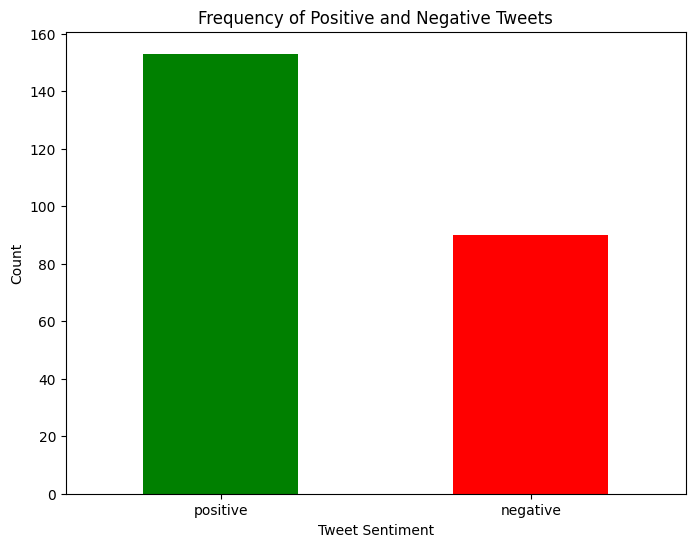


Summary Statistics for Word Count:
count    243.000000
mean      27.662551
std       62.586942
min        1.000000
25%        7.000000
50%       18.000000
75%       34.500000
max      724.000000
Name: word_count, dtype: float64

Summary Statistics for Character Count:
count     243.000000
mean      169.481481
std       351.058074
min         3.000000
25%        47.000000
50%       117.000000
75%       221.000000
max      4138.000000
Name: char_count, dtype: float64


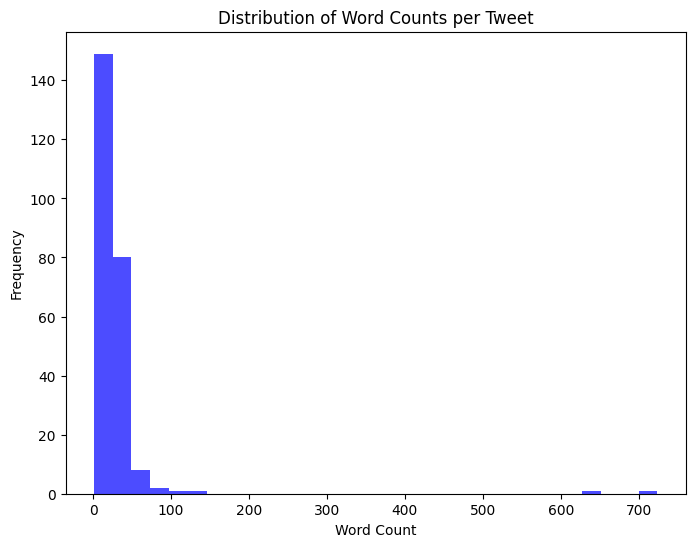

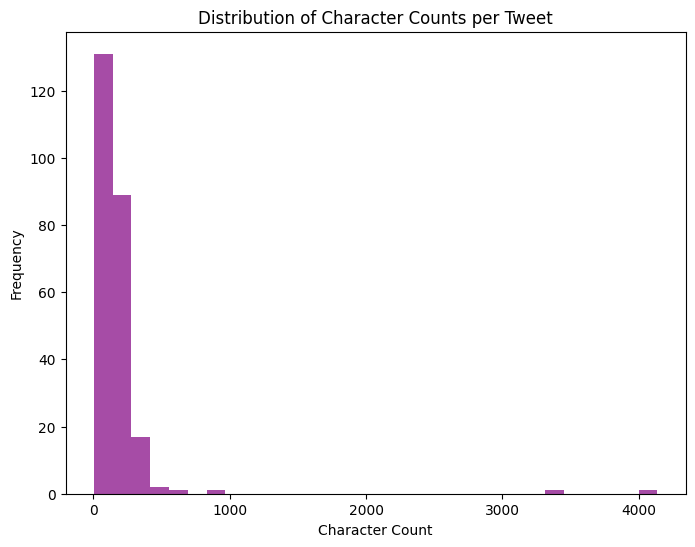

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming it's saved as 'sentiment_binary_dataset.csv')
df = pd.read_csv('/content/sentiment_binary_dataset.csv')

# Check the first few rows of the dataset
print(df.head())

# 1. Frequency of Positive and Negative Tweets
tweet_counts = df['type_of_tweet'].value_counts()
print("Frequency of Positive and Negative Tweets:\n", tweet_counts)

# Plotting the distribution of tweet types
plt.figure(figsize=(8, 6))
tweet_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Frequency of Positive and Negative Tweets')
plt.xlabel('Tweet Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 2. Calculate the Number of Words and Characters in Each Tweet
# Creating a new column for word count
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Creating a new column for character count
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

# 3. Summary Statistics of Word and Character Counts
print("\nSummary Statistics for Word Count:")
print(df['word_count'].describe())

print("\nSummary Statistics for Character Count:")
print(df['char_count'].describe())

# 4. Distribution of Word Counts
plt.figure(figsize=(8, 6))
df['word_count'].plot(kind='hist', bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Word Counts per Tweet')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# 5. Distribution of Character Counts
plt.figure(figsize=(8, 6))
df['char_count'].plot(kind='hist', bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Character Counts per Tweet')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()


In [ ]:
!pip install nlpaug


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 8.4 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('/content/sentiment_binary_dataset.csv')

# Print column names to ensure we're using the correct column for tweet text
print(df.columns)

Index(['Unnamed: 0', 'link', 'text', 'user', 'likes', 'quotes', 'retweets',
       'comments', 'type_of_tweet'],
      dtype='object')


In [ ]:
import pandas as pd

# Load the existing augmented dataset
df = pd.read_csv('/content/sentiment_binary_dataset.csv')

# Select only the required columns: 'text', 'type_of_tweet', and 'user'
df_filtered = df[['text', 'type_of_tweet', 'user']]

# Save the new dataset with only these columns
df_filtered.to_csv('/content/filtered_dataset.csv', index=False)

# Download the filtered dataset
from google.colab import files
files.download('/content/filtered_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=6c52719afec2b5ac204e854e9eec79aa050f45ae541a080c132f30f3c36a0436
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Suc

In [ ]:
#performing data augmentation using spacy and nltk

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import random
import pandas as pd
from nltk.corpus import wordnet
import nltk

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Download WordNet for synonyms
nltk.download('wordnet')

# Function to replace words with their synonyms using WordNet and spaCy
def synonym_replacement_spacy(text, num_changes=2):
    doc = nlp(text)
    new_words = []

    for token in doc:
        word = token.text
        # Only replace nouns and verbs for synonyms (you can add more POS types)
        if token.pos_ in ['NOUN', 'VERB']:
            synonyms = wordnet.synsets(word)
            if synonyms:
                synonym = random.choice(synonyms).lemmas()
                if synonym:
                    word = random.choice(synonym).name()
        new_words.append(word)

    return ' '.join(new_words)

# Function to randomly delete words in a sentence (using spaCy)
def random_deletion_spacy(text, deletion_prob=0.2):
    doc = nlp(text)
    words = [token.text for token in doc]

    if len(words) == 1:
        return text  # If there's only one word, return the original text

    # Randomly delete words based on deletion probability
    new_words = [word for word in words if random.uniform(0, 1) > deletion_prob]

    if len(new_words) == 0:
        # If all words were deleted, ensure that at least one word remains
        new_words = words[:1]  # Keep the first word or any default word

    return ' '.join(new_words)

# Data Augmentation: Apply both techniques
def augment_data_spacy(df, num_augmentations=1):
    augmented_texts = []

    for text in df['text']:
        if isinstance(text, str):  # Ensure the text is a string
            augmented_tweets = [text]

            for _ in range(num_augmentations):
                # Apply synonym replacement
                augmented_tweet = synonym_replacement_spacy(text)
                augmented_tweets.append(augmented_tweet)

                # Apply random deletion
                augmented_tweet = random_deletion_spacy(text)
                augmented_tweets.append(augmented_tweet)

            augmented_texts.extend(augmented_tweets)

    # Create a new dataframe with the augmented data
    augmented_df = pd.DataFrame({'text': augmented_texts, 'type_of_tweet': df['type_of_tweet'].iloc[0]})

    return augmented_df

# Load your dataset (update with your actual path)
df = pd.read_csv('/content/filtered_dataset.csv')

# Ensure all text data is a string and handle missing values
df['text'] = df['text'].fillna('')  # Fill missing values with an empty string
df['text'] = df['text'].astype(str)  # Ensure all values are strings

# Split dataset into positive and negative tweets
positive_tweets = df[df['type_of_tweet'] == 'positive']
negative_tweets = df[df['type_of_tweet'] == 'negative']

# Number of samples needed per class to reach 1000
target_count = 1000

# Augment positive and negative tweets until we reach target_count
augmented_positive_tweets = augment_data_spacy(positive_tweets, num_augmentations=(target_count - len(positive_tweets)) // len(positive_tweets))
augmented_negative_tweets = augment_data_spacy(negative_tweets, num_augmentations=(target_count - len(negative_tweets)) // len(negative_tweets))

# Combine the augmented datasets back into one
augmented_df = pd.concat([augmented_positive_tweets, augmented_negative_tweets], ignore_index=True)

# Save the augmented dataset
augmented_df.to_csv('augmented_dataset.csv', index=False)

# Show the first few rows of the augmented dataset
print(augmented_df.head())


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text type_of_tweet
0  Congratulations to President Trump and VPelect...      positive
1  congratulation to President Trump and VPelect ...      positive
2  Congratulations President Trump and VPelect Va...      positive
3  congratulation to President Trump and VPelect ...      positive
4  Congratulations to President Trump and VPelect...      positive


In [ ]:
import pandas as pd

# Load the dataset from the specified path
df = pd.read_csv('/content/augmented_dataset.csv')

# Drop rows where the 'text' column is empty or NaN
df_cleaned = df[df['text'].str.strip() != '']

# Alternatively, you can use dropna() to remove rows with NaN values in 'text' column:
# df_cleaned = df.dropna(subset=['text'])

# Verify the cleaned dataset
print(df_cleaned.head())

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('/content/cleaned_augmented_dataset.csv', index=False)


                                                text type_of_tweet
0  Congratulations to President Trump and VPelect...      positive
1  congratulation to President Trump and VPelect ...      positive
2  Congratulations President Trump and VPelect Va...      positive
3  congratulation to President Trump and VPelect ...      positive
4  Congratulations to President Trump and VPelect...      positive


                                                text type_of_tweet
0  Congratulations to President Trump and VPelect...      positive
1  congratulation to President Trump and VPelect ...      positive
2  Congratulations President Trump and VPelect Va...      positive
3  congratulation to President Trump and VPelect ...      positive
4  Congratulations to President Trump and VPelect...      positive


<ipython-input-38-c2274595a6ff>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type_of_tweet', palette='Set2')


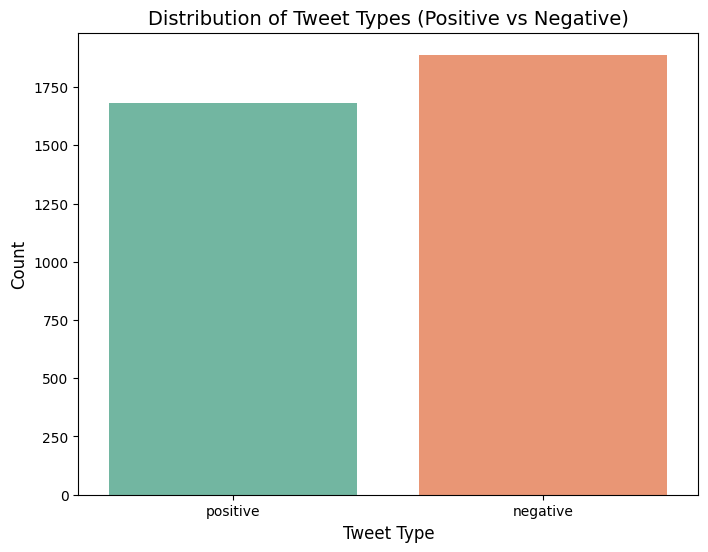

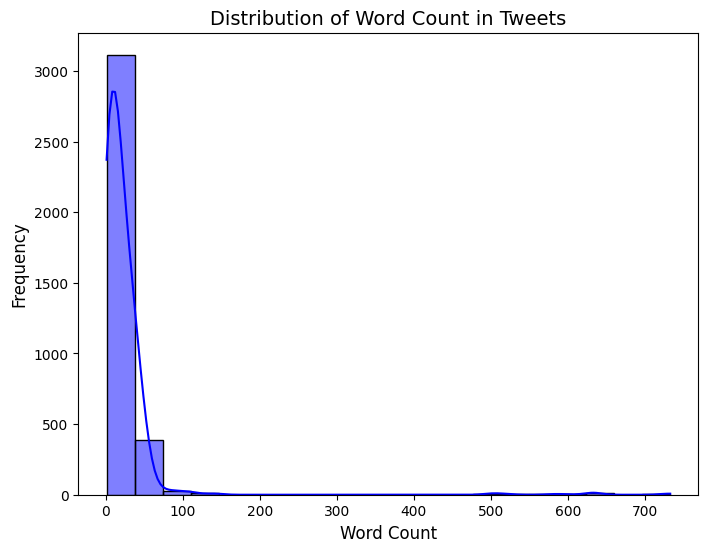

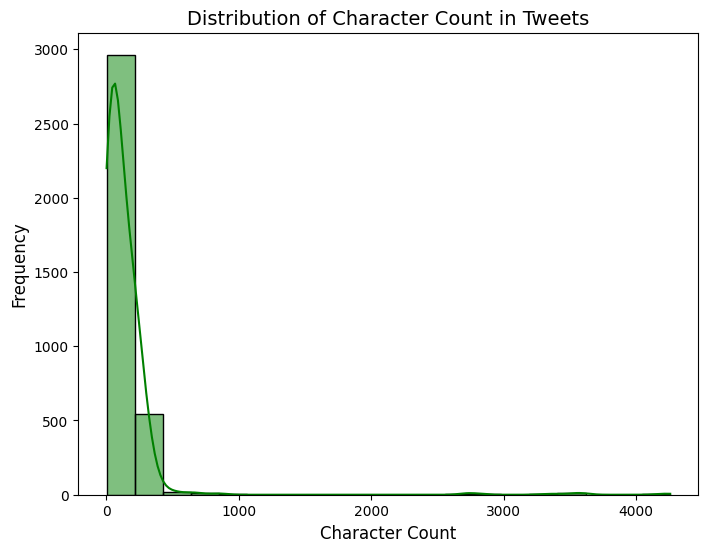

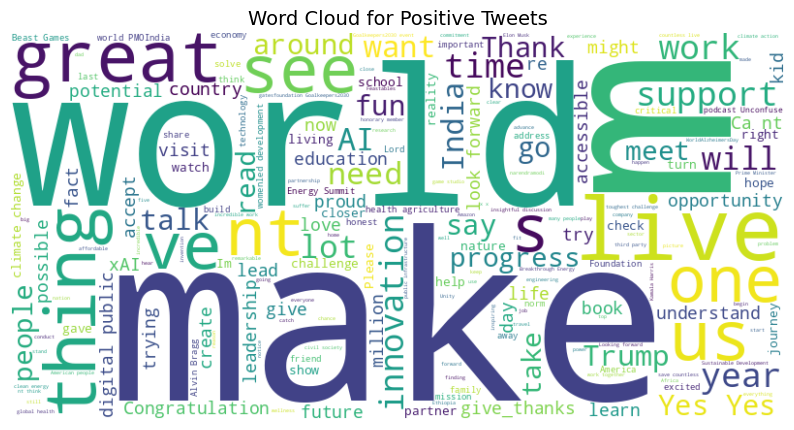

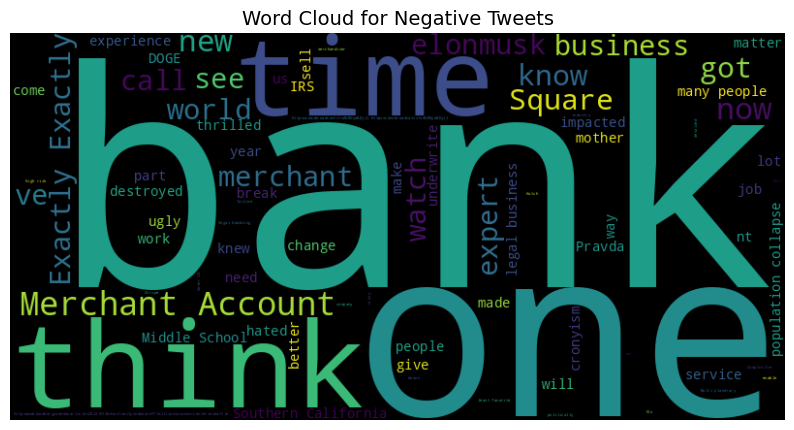

Basic Statistics of the Dataset:
        word_count   char_count
count  3572.000000  3572.000000
mean     23.151176   142.386338
std      58.392641   330.175634
min       1.000000     2.000000
25%       5.000000    32.000000
50%      13.000000    79.500000
75%      28.000000   179.000000
max     733.000000  4258.000000


<ipython-input-38-c2274595a6ff>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type_of_tweet', y='word_count', palette='Set2')


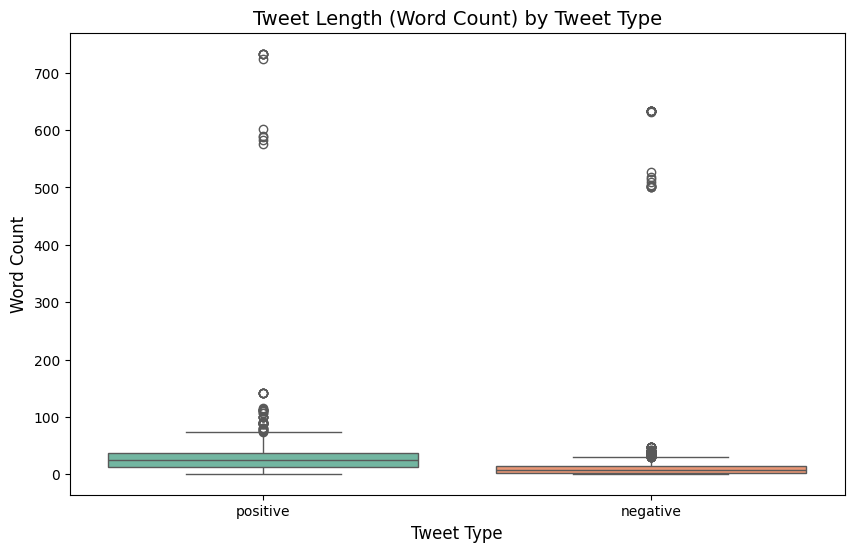

<ipython-input-38-c2274595a6ff>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type_of_tweet', y='char_count', palette='Set2')


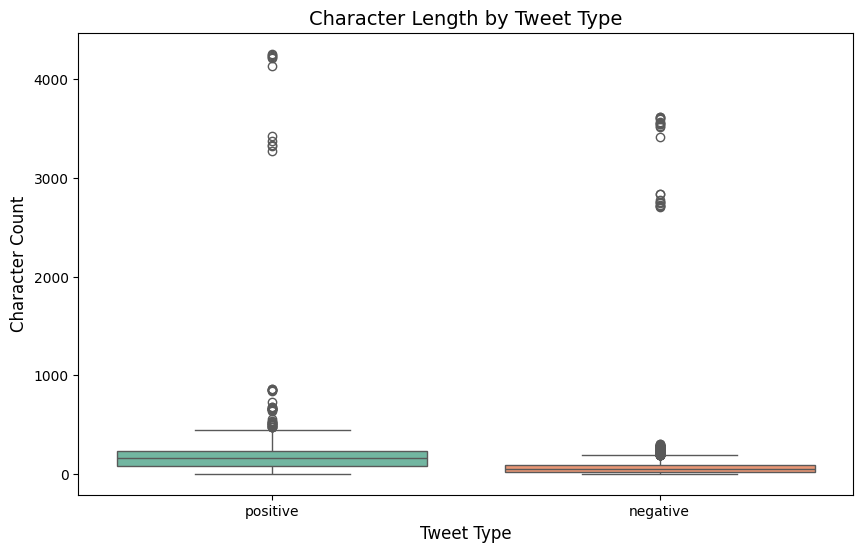

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the cleaned dataset
df = pd.read_csv('/content/cleaned_augmented_dataset.csv')

# Check the first few rows of the dataset
print(df.head())

# --- 1. Distribution of Tweet Types (Positive vs Negative) ---
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type_of_tweet', palette='Set2')
plt.title('Distribution of Tweet Types (Positive vs Negative)', fontsize=14)
plt.xlabel('Tweet Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# --- 2. Distribution of Word Count in Tweets ---
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 6))
sns.histplot(df['word_count'], kde=True, color='blue', bins=20)
plt.title('Distribution of Word Count in Tweets', fontsize=14)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# --- 3. Distribution of Character Count in Tweets ---
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

plt.figure(figsize=(8, 6))
sns.histplot(df['char_count'], kde=True, color='green', bins=20)
plt.title('Distribution of Character Count in Tweets', fontsize=14)
plt.xlabel('Character Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# --- 4. Word Cloud for Positive Tweets ---
positive_tweets = df[df['type_of_tweet'] == 'positive']['text'].str.cat(sep=' ')
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud for Positive Tweets', fontsize=14)
plt.axis('off')
plt.show()

# --- 5. Word Cloud for Negative Tweets ---
negative_tweets = df[df['type_of_tweet'] == 'negative']['text'].str.cat(sep=' ')
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_tweets)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud for Negative Tweets', fontsize=14)
plt.axis('off')
plt.show()

# --- 6. Basic Statistics ---
print("Basic Statistics of the Dataset:")
print(df[['word_count', 'char_count']].describe())

# --- 7. Tweet Length vs Tweet Type ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type_of_tweet', y='word_count', palette='Set2')
plt.title('Tweet Length (Word Count) by Tweet Type', fontsize=14)
plt.xlabel('Tweet Type', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.show()

# --- 8. Character Length vs Tweet Type ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type_of_tweet', y='char_count', palette='Set2')
plt.title('Character Length by Tweet Type', fontsize=14)
plt.xlabel('Tweet Type', fontsize=12)
plt.ylabel('Character Count', fontsize=12)
plt.show()


                                                text type_of_tweet
0  Congratulations to President Trump and VPelect...      positive
1  congratulation to President Trump and VPelect ...      positive
2  Congratulations President Trump and VPelect Va...      positive
3  congratulation to President Trump and VPelect ...      positive
4  Congratulations to President Trump and VPelect...      positive


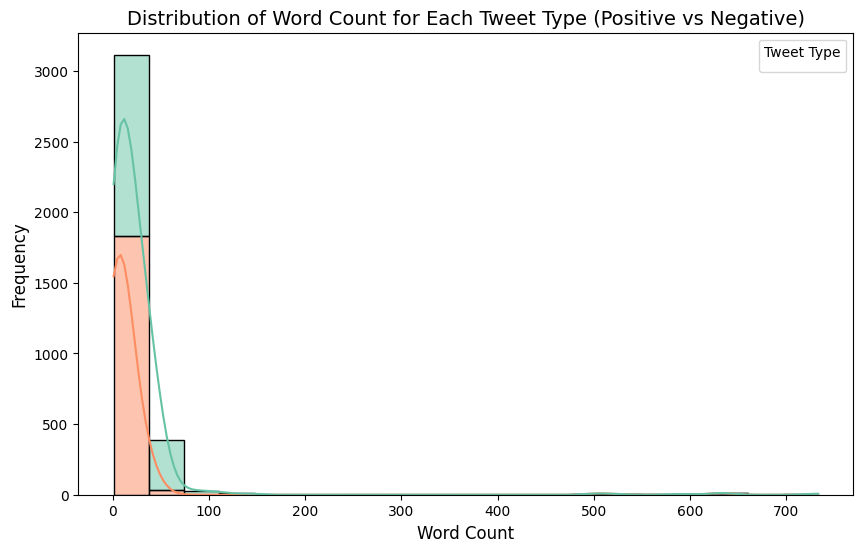

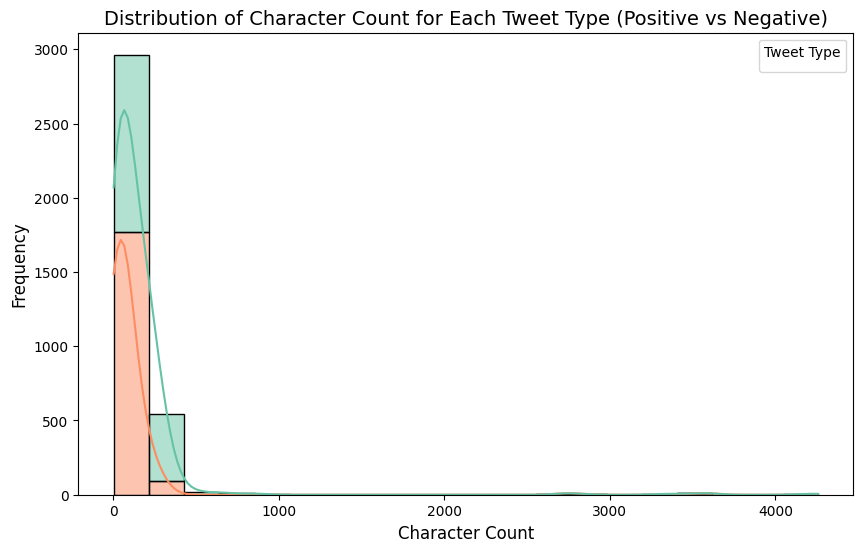

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('/content/cleaned_augmented_dataset.csv')

# Check the first few rows of the dataset
print(df.head())

# --- 1. Distribution of Word Count for Each Tweet Type ---
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='word_count', hue='type_of_tweet', kde=True, multiple="stack", palette='Set2', bins=20)
plt.title('Distribution of Word Count for Each Tweet Type (Positive vs Negative)', fontsize=14)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Tweet Type', loc='upper right')
plt.show()

# --- 2. Distribution of Character Count for Each Tweet Type ---
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='char_count', hue='type_of_tweet', kde=True, multiple="stack", palette='Set2', bins=20)
plt.title('Distribution of Character Count for Each Tweet Type (Positive vs Negative)', fontsize=14)
plt.xlabel('Character Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Tweet Type', loc='upper right')
plt.show()


<ipython-input-40-c724241d98f9>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=positive_words_df, palette='Blues_d')


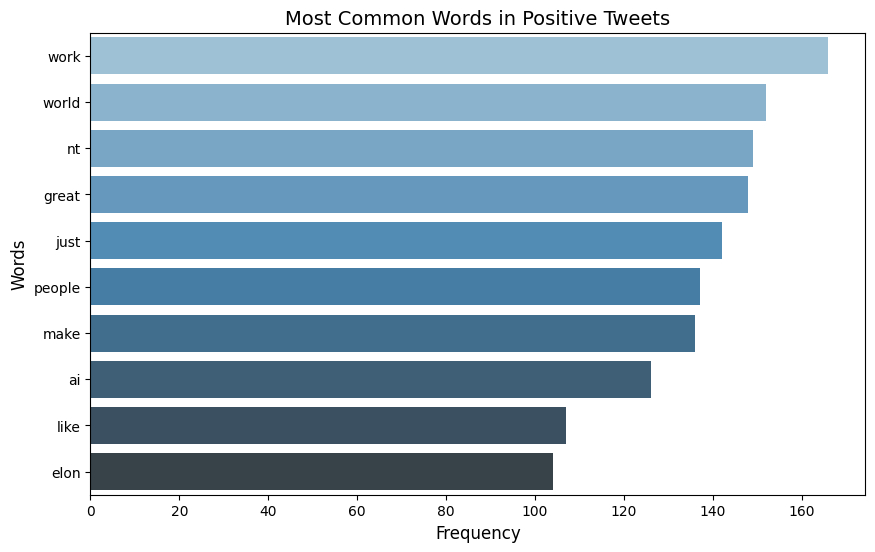

<ipython-input-40-c724241d98f9>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=negative_words_df, palette='Reds_d')


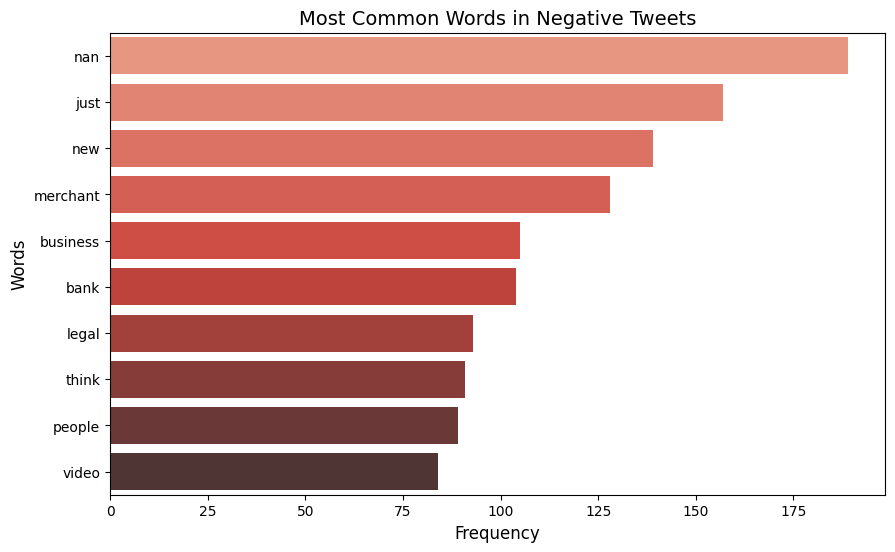

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import string

# Load the cleaned dataset
df = pd.read_csv('/content/cleaned_augmented_dataset.csv')

# --- 1. Preprocess the text ---
def preprocess_text(text):
    """Lowercase, remove punctuation"""
    text = str(text).lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    return text

# Apply text preprocessing to all rows
df['cleaned_text'] = df['text'].apply(preprocess_text)

# --- 2. Extract most common words for positive and negative tweets ---

# Filter the positive and negative tweets
positive_tweets = df[df['type_of_tweet'] == 'positive']
negative_tweets = df[df['type_of_tweet'] == 'negative']

# Define a function to get the most common words using CountVectorizer
def get_most_common_words(tweets, num_words=10):
    """Extracts the most common words from the tweets using CountVectorizer"""
    vectorizer = CountVectorizer(stop_words='english', max_features=num_words)
    word_count_matrix = vectorizer.fit_transform(tweets['cleaned_text'])
    word_count = word_count_matrix.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()

    # Combine words and their corresponding counts
    word_freq = list(zip(words, word_count))
    word_freq_sorted = sorted(word_freq, key=lambda x: x[1], reverse=True)

    return word_freq_sorted

# Get most common words for positive and negative tweets
positive_common_words = get_most_common_words(positive_tweets, num_words=10)
negative_common_words = get_most_common_words(negative_tweets, num_words=10)

# Convert to DataFrames for easy plotting
positive_words_df = pd.DataFrame(positive_common_words, columns=['word', 'frequency'])
negative_words_df = pd.DataFrame(negative_common_words, columns=['word', 'frequency'])

# --- 3. Visualize the most common words ---

# Plotting for positive tweets
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='word', data=positive_words_df, palette='Blues_d')
plt.title('Most Common Words in Positive Tweets', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.show()

# Plotting for negative tweets
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='word', data=negative_words_df, palette='Reds_d')
plt.title('Most Common Words in Negative Tweets', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.show()


data pre processing using glove embedding for textual data

In [ ]:
import numpy as np
import pandas as pd
import string

# Load the GloVe embeddings
def load_glove_model(glove_file):
    embeddings = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    print(f"Loaded {len(embeddings)} GloVe vectors.")
    return embeddings

# Clean the text (remove punctuation, convert to lowercase)
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# Tokenize text (split by spaces)
def tokenize_text(text):
    return text.split()  # Simple word split by spaces

# Get the GloVe vector for each word in the sentence
def get_vector_for_text(text, glove_model):
    words = text.split()
    word_vectors = []
    for word in words:
        if word in glove_model:
            word_vectors.append(glove_model[word])
        else:
            word_vectors.append(np.zeros(300))  # Use a zero vector if the word is not in GloVe
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(300)

# Load your dataset
df = pd.read_csv('/content/cleaned_augmented_dataset.csv')  # Update with your actual dataset path

# Initialize the GloVe model (GloVe file should be a path to the pre-trained file)
glove_model = load_glove_model("/content/glove.6B.300d.txt")  # Update this path with the actual GloVe file path

# Preprocess and convert text to GloVe embeddings
df['cleaned_text'] = df['text'].apply(lambda x: clean_text(str(x)))  # Clean the text
df['tokenized_text'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))  # Tokenize the text

# Get GloVe embeddings for each sentence
df['glove_embeddings'] = df['cleaned_text'].apply(lambda x: get_vector_for_text(x, glove_model))

# Show the first few rows of the dataframe to check the result
print(df[['text', 'glove_embeddings']].head())

# Save the new dataset with GloVe embeddings
df.to_csv('/content/augmented_dataset_with_glove.csv', index=False)


Loaded 228387 GloVe vectors.
                                                text  \
0  Congratulations to President Trump and VPelect...   
1  congratulation to President Trump and VPelect ...   
2  Congratulations President Trump and VPelect Va...   
3  congratulation to President Trump and VPelect ...   
4  Congratulations to President Trump and VPelect...   

                                    glove_embeddings  
0  [-0.0840652312617749, 0.08451089846527983, -0....  
1  [-0.08497713840306671, 0.06725417795390713, -0...  
2  [-0.09706471969709835, 0.08939612753682821, -0...  
3  [-0.10054646419946017, 0.06521350378035243, -0...  
4  [-0.07998850031031503, 0.09373810099431365, -0...  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │       1,321,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,321,800 (5.04 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,321,800 (5.04 MB)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.5969 - loss: 0.6836 - val_accuracy: 0.7164 - val_loss: 0.6420
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7140 - loss: 0.6400 - val_accuracy: 0.7725 - val_loss: 0.5824
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7819 - loss: 0.5670 - val_accuracy: 0.7681 - val_loss: 0.5091
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7786 - loss: 0.4938 - val_accuracy: 0.7947 - val_loss: 0.4423
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7993 - loss: 0.4432 - val_accuracy: 0.8316 - val_loss: 0.3828
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8391 - loss: 0.3625 - val_accuracy: 0.8493 - val_loss: 0.3460
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8813 - loss: 0.2985 - val_accuracy: 0.8789 - val_loss: 0.3155
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8927 - loss: 0.2864 - val_accuracy: 0.

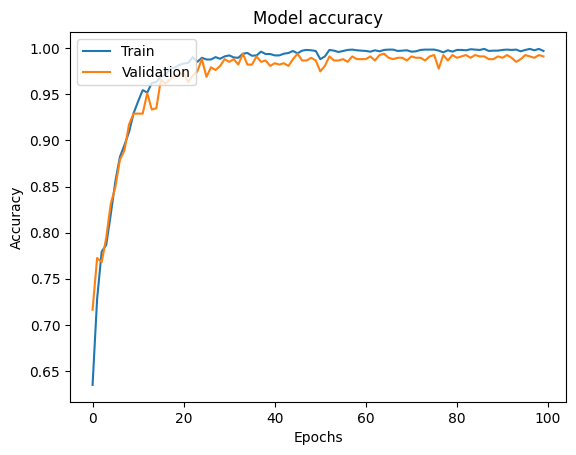

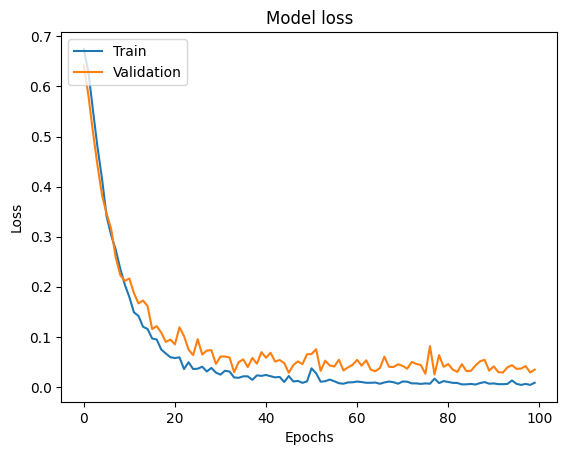

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the preprocessed dataset (ensure the file path is correct)
df = pd.read_csv('/content/augmented_dataset_with_glove.csv')

# Drop rows where the 'text' column is empty
df = df.dropna(subset=['text'])

# Map sentiment labels (assuming 'type_of_tweet' contains sentiment labels 'positive' or 'negative')
df['label'] = df['type_of_tweet'].map({'positive': 1, 'negative': 0})

# Prepare the text data and labels
texts = df['text'].values  # Input texts
labels = df['label'].values  # Labels (0: negative, 1: positive)

# Tokenize the text data (you can use `Tokenizer` to convert text into sequences of integers)
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Get the vocabulary size (total number of unique tokens)
vocab_size = len(tokenizer.word_index) + 1

# Pad the sequences to ensure they are of the same length
max_sequence_length = 100  # Adjust based on your dataset's average tweet length
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Load GloVe embeddings (ensure the path is correct)
embedding_dim = 300
embeddings_index = {}
with open('/content/glove.6B.300d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build the Bidirectional LSTM model
model = Sequential()

# Embedding layer using pre-trained GloVe embeddings
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_sequence_length,
                    trainable=False))

# First Bidirectional LSTM layer
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2)))

# Dropout layer
model.add(Dropout(0.2))

# Second Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64, return_sequences=False, dropout=0.2)))

# Dense layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Output layer with Sigmoid activation (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=1e-4)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification Report
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Plot training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


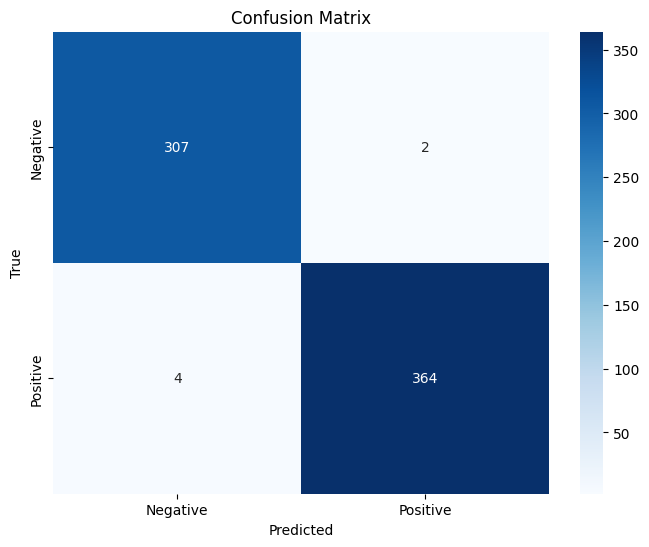

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


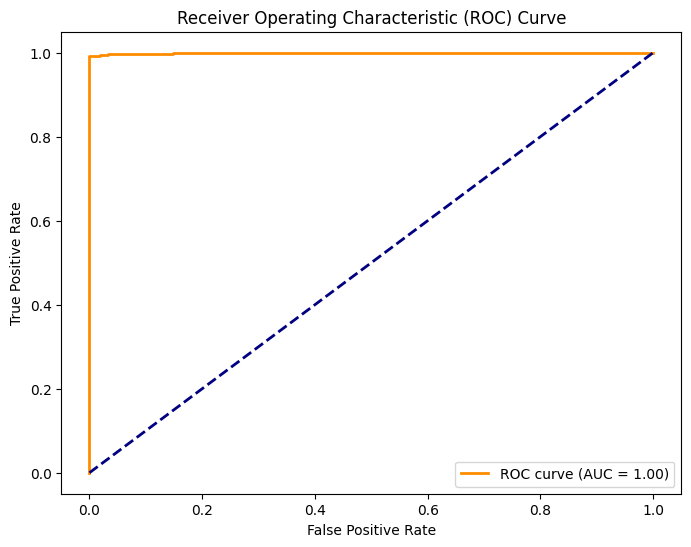

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


classic lstm model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │       1,321,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,321,800 (5.04 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,321,800 (5.04 MB)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5228 - loss: 0.6941 - val_accuracy: 0.6484 - val_loss: 0.6668
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6264 - loss: 0.6694 - val_accuracy: 0.7223 - val_loss: 0.6345
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6934 - loss: 0.6386 - val_accuracy: 0.7666 - val_loss: 0.5957
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7389 - loss: 0.5964 - val_accuracy: 0.7740 - val_loss: 0.5477
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7675 - loss: 0.5519 - val_accuracy: 0.7755 - val_loss: 0.5062
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7850 - loss: 0.5047 - val_accuracy: 0.7932 - val_loss: 0.4612
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7976 - loss: 0.4737 - val_accuracy: 0.8050 - val_loss: 0.4315
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8314 - loss: 0.4236 - val_accuracy: 0.

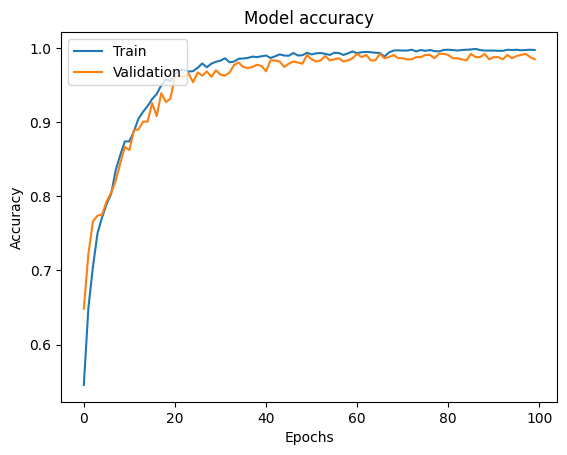

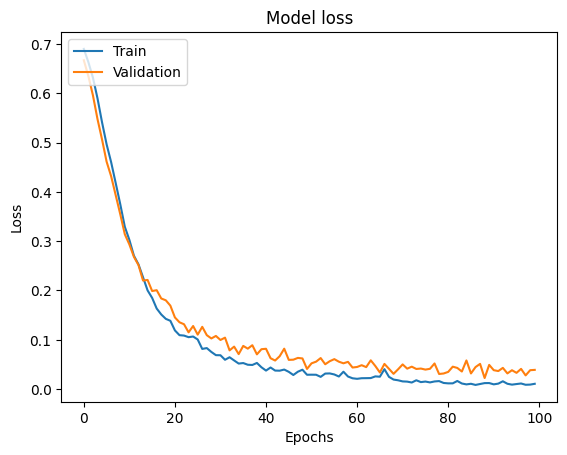

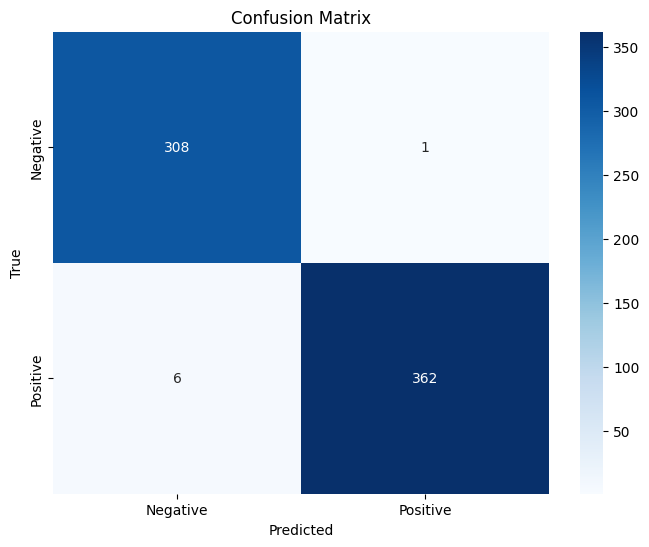

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


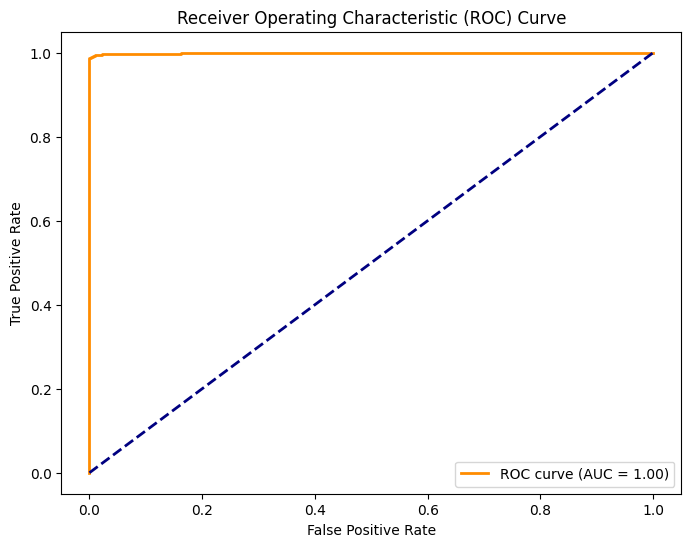

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the preprocessed dataset
df = pd.read_csv('/content/augmented_dataset_with_glove.csv')

# Drop rows where the 'text' column is empty
df = df.dropna(subset=['text'])

# Map sentiment labels (assuming 'type_of_tweet' contains sentiment labels 'positive' or 'negative')
df['label'] = df['type_of_tweet'].map({'positive': 1, 'negative': 0})

# Prepare the text data and labels
texts = df['text'].values  # Input texts
labels = df['label'].values  # Labels (0: negative, 1: positive)

# Tokenize the text data (you can use `Tokenizer` to convert text into sequences of integers)
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Get the vocabulary size (total number of unique tokens)
vocab_size = len(tokenizer.word_index) + 1

# Pad the sequences to ensure they are of the same length
max_sequence_length = 100  # Adjust based on your dataset's average tweet length
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Load GloVe embeddings (ensure the path is correct)
embedding_dim = 300
embeddings_index = {}
with open('/content/glove.6B.300d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build the LSTM model (not Bidirectional)
model = Sequential()

# Embedding layer using pre-trained GloVe embeddings
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_sequence_length,
                    trainable=False))

# LSTM layer
model.add(LSTM(128, return_sequences=False, dropout=0.2))

# Dropout layer
model.add(Dropout(0.2))

# Dense layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Output layer with Sigmoid activation (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=1e-4)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification Report
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │       1,321,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,321,800 (5.04 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,321,800 (5.04 MB)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.5819 - loss: 0.6669 - val_accuracy: 0.7518 - val_loss: 0.5789
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7381 - loss: 0.5837 - val_accuracy: 0.7474 - val_loss: 0.5472
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7571 - loss: 0.5410 - val_accuracy: 0.7637 - val_loss: 0.5168
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7643 - loss: 0.5130 - val_accuracy: 0.7740 - val_loss: 0.4898
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7895 - loss: 0.4725 - val_accuracy: 0.7829 - val_loss: 0.4529
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8010 - loss: 0.4424 - val_accuracy: 0.8301 - val_loss: 0.4165
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8472 - loss: 0.3950 - val_accuracy: 0.8419 - val_loss: 0.3787
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8675 - loss: 0.3617 - val_accuracy: 0.8759 -

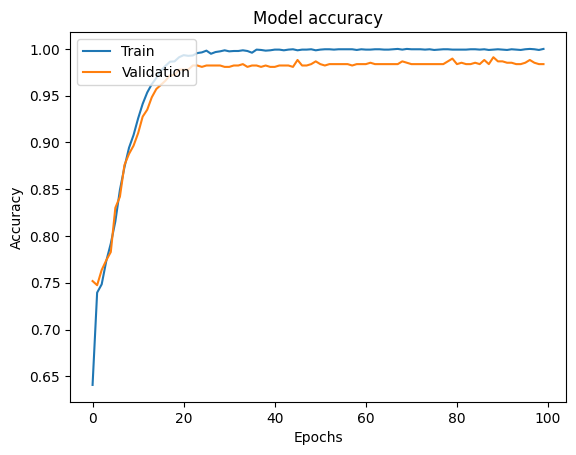

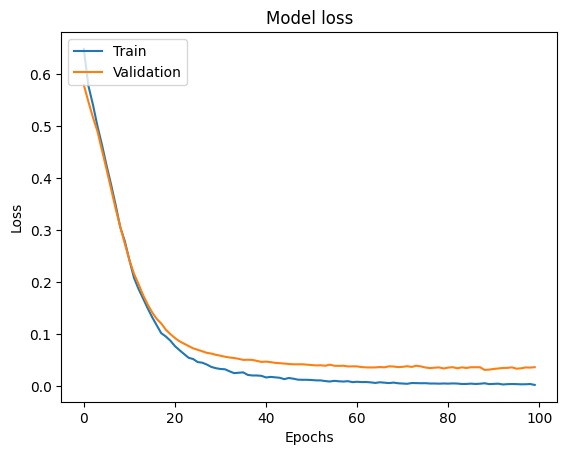

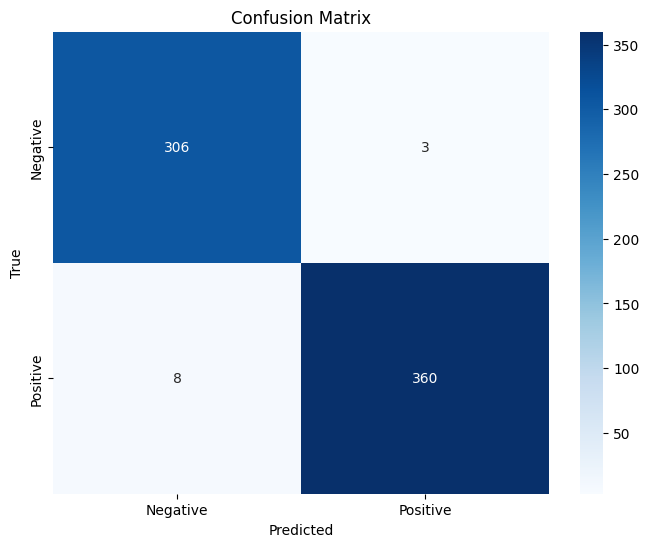

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


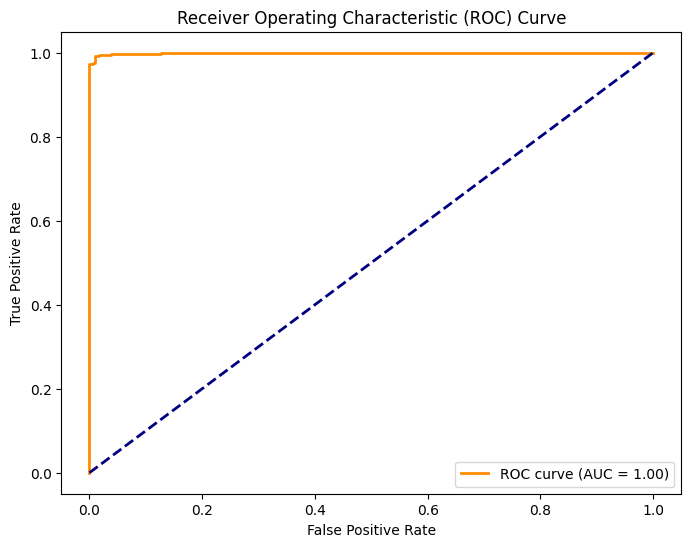

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the preprocessed dataset
df = pd.read_csv('/content/augmented_dataset_with_glove.csv')

# Drop rows where the 'text' column is empty
df = df.dropna(subset=['text'])

# Map sentiment labels (assuming 'type_of_tweet' contains sentiment labels 'positive' or 'negative')
df['label'] = df['type_of_tweet'].map({'positive': 1, 'negative': 0})

# Prepare the text data and labels
texts = df['text'].values  # Input texts
labels = df['label'].values  # Labels (0: negative, 1: positive)

# Tokenize the text data (you can use `Tokenizer` to convert text into sequences of integers)
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Get the vocabulary size (total number of unique tokens)
vocab_size = len(tokenizer.word_index) + 1

# Pad the sequences to ensure they are of the same length
max_sequence_length = 100  # Adjust based on your dataset's average tweet length
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Load GloVe embeddings (ensure the path is correct)
embedding_dim = 300
embeddings_index = {}
with open('/content/glove.6B.300d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build the 1D CNN model
model = Sequential()

# Embedding layer using pre-trained GloVe embeddings
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_sequence_length,
                    trainable=False))

# Convolutional Layer with 128 filters and kernel size of 5
model.add(Conv1D(128, 5, activation='relu'))

# Max pooling layer to reduce dimensionality
model.add(MaxPooling1D(pool_size=2))

# Flatten layer to convert the 2D matrix to 1D vector
model.add(Flatten())

# Dense layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer with Sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=1e-4)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification Report
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │       1,321,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,321,800 (5.04 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,321,800 (5.04 MB)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.5052 - loss: 0.7216 - val_accuracy: 0.5111 - val_loss: 0.7010
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5357 - loss: 0.6949 - val_accuracy: 0.5790 - val_loss: 0.6793
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5854 - loss: 0.6741 - val_accuracy: 0.6514 - val_loss: 0.6612
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6111 - loss: 0.6645 - val_accuracy: 0.6677 - val_loss: 0.6446
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6373 - loss: 0.6468 - val_accuracy: 0.6957 - val_loss: 0.6264
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6756 - loss: 0.6274 - val_accuracy: 0.7208 - val_loss: 0.6084
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7064 - loss: 0.6108 - val_accuracy: 0.7518 - val_loss: 0.5892
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7364 - loss: 0.5801 - val_accuracy: 0

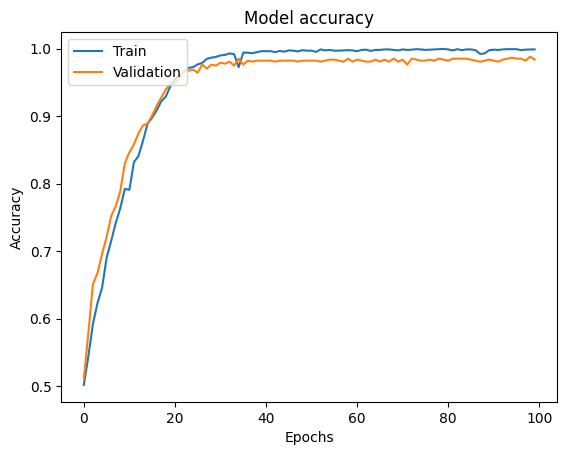

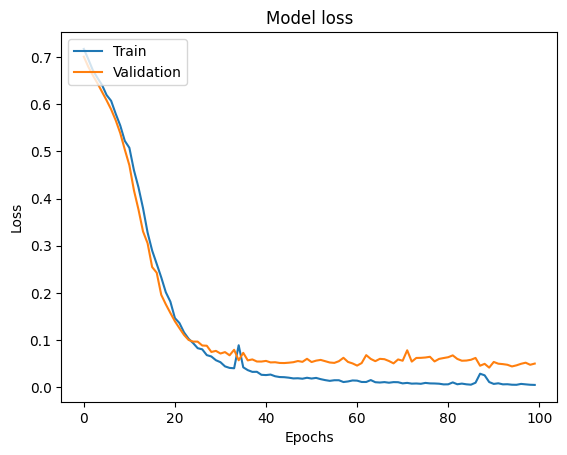

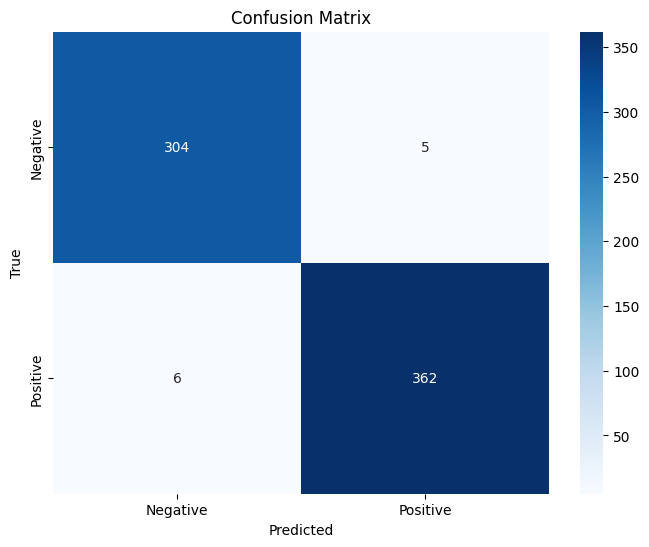

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


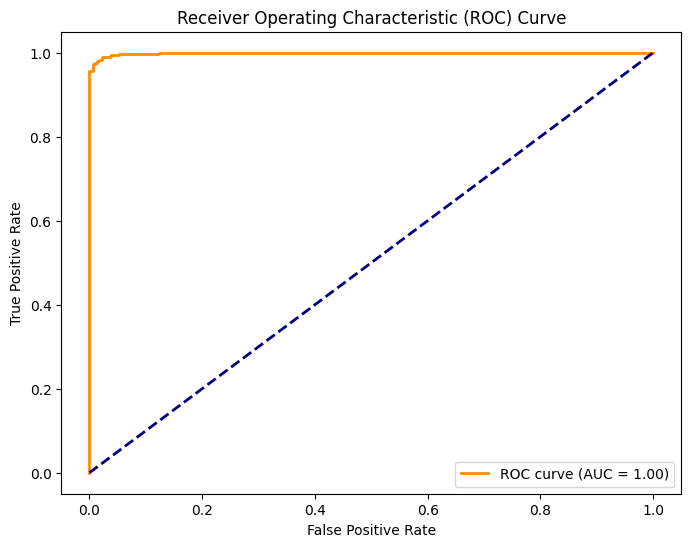

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# Load the preprocessed dataset
df = pd.read_csv('/content/augmented_dataset_with_glove.csv')

# Drop rows where the 'text' column is empty
df = df.dropna(subset=['text'])

# Map sentiment labels (assuming 'type_of_tweet' contains sentiment labels 'positive' or 'negative')
df['label'] = df['type_of_tweet'].map({'positive': 1, 'negative': 0})

# Prepare the text data and labels
texts = df['text'].values  # Input texts
labels = df['label'].values  # Labels (0: negative, 1: positive)

# Tokenize the text data (you can use `Tokenizer` to convert text into sequences of integers)
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Get the vocabulary size (total number of unique tokens)
vocab_size = len(tokenizer.word_index) + 1

# Pad the sequences to ensure they are of the same length
max_sequence_length = 100  # Adjust based on your dataset's average tweet length
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Load GloVe embeddings (ensure the path is correct)
embedding_dim = 300
embeddings_index = {}
with open('/content/glove.6B.300d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build the Simple RNN model
model = Sequential()

# Embedding layer using pre-trained GloVe embeddings
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_sequence_length,
                    trainable=False))

# Simple RNN layer with 128 units
model.add(SimpleRNN(128, activation='relu'))

# Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Dense layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Output layer with Sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=1e-4)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification Report
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
